<a href="https://colab.research.google.com/github/ramyamahesh1126/RainPrediction/blob/main/RainPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is to predict the rainfall from weather report. Project involves cleaning the data, feature extraction amd modelling to predict the rainfall in a particular city. RandomForestRegressor method is used to predict the rainfall for a particluar region. 
Data set obtained from https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

Upload the data to google colab

In [3]:
from google.colab import files
files.upload()

Saving RainPrediction.csv to RainPrediction.csv


Read the csv file and load the weather data into dataframe.
Describe the dataset

In [42]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/RainPrediction.csv",skiprows=1)
df.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,11/6/07 0:00,11/6/07,2007,11,6,0,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5
1,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,11/6/07 1:00,11/6/07,2007,11,6,1,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4
2,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,11/6/07 2:00,11/6/07,2007,11,6,2,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
3,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,11/6/07 3:00,11/6/07,2007,11,6,3,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
4,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,11/6/07 4:00,11/6/07,2007,11,6,4,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5


Check the number of columns and rows

In [43]:
df.shape

(506002, 31)

Print all the columns from the dataframe

In [44]:
df.columns

Index(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'mdct',
       'date', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd',
       'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin',
       'wdsp', 'wdct', 'gust'],
      dtype='object')

Print all the values of city column. 

In [45]:
df['city'].unique()

array(['São Gonçalo', 'Vitória', 'Santa Teresa', 'Linhares',
       'Alfredo Chaves', 'São Mateus'], dtype=object)

Here, we are interested only in the city 'São Mateus'. The city is randomly picked for this experiment

In [46]:
df = df[df.city=='São Mateus']
df.head()
df.shape

(86890, 31)

Drop the unwanted columns. Dropping the columns
1. Weather station Id
2. Weather station name
3. Elevation 
4. Latitude 
5. Longitude
6. Weather station number
7. Province
8. Solar Radiation
9. Dew point (can be dropped because its directly related to relative humidity field)
10. Windspeed
11. Wind direction
12. Wind Gust

In [47]:
df = df.drop(['wsid','wsnm','elvt','lat','lon','inme','prov','gbrd','dewp','dmax','dmin','wdsp','wdct','gust'],axis='columns')
df.shape

(86890, 17)

Preview the table once the unwanted columns are dropped

In [48]:
df.head()

,city,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,temp,tmax,tmin,hmdy,hmax,hmin
419112,São Mateus,10/25/06 0:00,10/25/06,2006,10,25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
419113,São Mateus,10/25/06 1:00,10/25/06,2006,10,25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
419114,São Mateus,10/25/06 2:00,10/25/06,2006,10,25,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
419115,São Mateus,10/25/06 3:00,10/25/06,2006,10,25,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
419116,São Mateus,10/25/06 4:00,10/25/06,2006,10,25,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


Here, we are only interested in the recent data. Hence dropping the data before the year 2010 

In [49]:
df = df[df.yr>=2010]
df.head()

,city,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,temp,tmax,tmin,hmdy,hmax,hmin
447048,São Mateus,1/1/10 0:00,1/1/10,2010,1,1,0,NaN,1007.6,1007.6,1006.2,26.2,26.6,26.2,77,82,77
447049,São Mateus,1/1/10 1:00,1/1/10,2010,1,1,1,NaN,1008.5,1008.5,1007.6,25.8,26.2,25.8,78,78,77
447050,São Mateus,1/1/10 2:00,1/1/10,2010,1,1,2,NaN,1008.8,1009.0,1008.5,25.2,25.8,25.2,81,81,78
447051,São Mateus,1/1/10 3:00,1/1/10,2010,1,1,3,NaN,1008.5,1008.8,1008.5,24.4,25.2,24.4,86,86,81
447052,São Mateus,1/1/10 4:00,1/1/10,2010,1,1,4,NaN,1008.0,1008.5,1008.0,24.5,24.7,24.4,87,87,86


Convert the tmax(max temperature), tmin(min temperature), hmax(max humidity), hmin(min humidity), smax(max air pressure), smin(min air pressure), prcp(precipitaion) to float values. 
Convert date to proper string format

In [12]:
df['tmax'] = df['tmax'].astype('float64')
df['tmin'] = df['tmin'].astype('float64')
df['hmax'] = df['hmax'].astype('float64')
df['hmin'] = df['hmin'].astype('float64')
df['smax'] = df['smax'].astype('float64')
df['smin'] = df['smin'].astype('float64')
df['prcp'] = df['prcp'].astype('float64')
df['date'] = df['date'].astype(str)
df.head()

,city,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,temp,tmax,tmin,hmdy,hmax,hmin
447048,São Mateus,1/1/10 0:00,1/1/10,2010,1,1,0,NaN,1007.6,1007.6,1006.2,26.2,26.6,26.2,77,82.0,77.0
447049,São Mateus,1/1/10 1:00,1/1/10,2010,1,1,1,NaN,1008.5,1008.5,1007.6,25.8,26.2,25.8,78,78.0,77.0
447050,São Mateus,1/1/10 2:00,1/1/10,2010,1,1,2,NaN,1008.8,1009.0,1008.5,25.2,25.8,25.2,81,81.0,78.0
447051,São Mateus,1/1/10 3:00,1/1/10,2010,1,1,3,NaN,1008.5,1008.8,1008.5,24.4,25.2,24.4,86,86.0,81.0
447052,São Mateus,1/1/10 4:00,1/1/10,2010,1,1,4,NaN,1008.0,1008.5,1008.0,24.5,24.7,24.4,87,87.0,86.0


Describing the data types after conversion

In [50]:
df.dtypes

city     object
mdct     object
date     object
yr        int64
mo        int64
da        int64
hr        int64
prcp    float64
stp     float64
smax    float64
smin    float64
temp    float64
tmax    float64
tmin    float64
hmdy      int64
hmax      int64
hmin      int64
dtype: object

The given data has max and min temperature per hour. But we are interested in max and min temperature per day. Obtaining the max and min temperature per day. 

In [51]:
 grouper = df.groupby('date').agg( \
    max_temp=('tmax', 'max'),
    min_temp=('tmin','min'),
    max_humid=('hmax', 'max'),
    min_humid=('hmin','min'),
    max_air_pressure=('smax','max'),
    min_air_pressure=('smin','min'),
    max_prcp=('prcp','max'))


df2= grouper['max_temp'].to_frame(name = 'max_temp').reset_index() 
df3= grouper['min_temp'].to_frame(name = 'min_temp').reset_index()
df4= grouper['max_humid'].to_frame(name = 'max_humid').reset_index()
df5= grouper['min_humid'].to_frame(name = 'min_humid').reset_index()
df6= grouper['max_air_pressure'].to_frame(name = 'max_air_pressure').reset_index()
df7= grouper['min_air_pressure'].to_frame(name = 'min_air_pressure').reset_index()
df8 = grouper['max_prcp'].to_frame(name='max_prcp').reset_index()

new = df2.filter(['max_temp','date'], axis=1)
new['min_temp'] = df3['min_temp'].values
new['max_humid'] = df4['max_humid'].values
new['min_humid'] = df5['min_humid'].values
new['max_air_pressure'] = df6['max_air_pressure'].values
new['min_air_pressure'] = df7['min_air_pressure'].values
new['max_prcp']= df8['max_prcp'].values
new['city'] = 'São Mateus'

new.head()

,max_temp,date,min_temp,max_humid,min_humid,max_air_pressure,min_air_pressure,max_prcp,city
0,31.9,1/1/10,24.1,92,52,1010.2,1006.2,NaN,São Mateus
1,30.1,1/1/11,22.8,95,53,1008.2,1004.4,0.2,São Mateus
2,29.4,1/1/12,23.5,93,65,1008.0,1004.5,0.8,São Mateus
3,31.4,1/1/13,22.1,96,53,1012.2,1008.2,0.8,São Mateus
4,31.9,1/1/14,20.7,98,55,1009.8,1005.2,NaN,São Mateus


Describe the rows and columns once the data is aggregated

In [52]:
new.shape

(2457, 9)

Check if any of the columns contain null values

In [53]:
new.isnull().sum()

max_temp               0
date                   0
min_temp               0
max_humid              0
min_humid              0
max_air_pressure       0
min_air_pressure       0
max_prcp            1204
city                   0
dtype: int64

Rain condition on a particular day depends on 4 major factors.
1. Temperature
2. Humidity
3. Air Pressure
4. Precipitation

All the above factors are equally important. We can't drop the tables which has no precipitation values since other factors might induce rain. 

We are extracting the feature is_raining from the above 4 columns. is_raining is a boolean value which says with the given weather conditions, do we expect a rain on that particular day. 

This is calculated by the below conditions
1. When there is precipitation
2. When the humidity is high and air pressure is minimum

In [54]:
# create a list of our conditions
conditions = [
    (new['max_prcp'] >= 0),
    (new['max_humid'] > 80.0) & (new['min_air_pressure'] < 1006.2),
    ]

# create a list of the values we want to assign for each condition
values = ['TRUE', 'TRUE']

# create a new column and use np.select to assign values to it using our lists as arguments
new['is_raining?'] = np.select(conditions, values)

# display updated DataFrame
new.head()

,max_temp,date,min_temp,max_humid,min_humid,max_air_pressure,min_air_pressure,max_prcp,city,is_raining?
0,31.9,1/1/10,24.1,92,52,1010.2,1006.2,NaN,São Mateus,0
1,30.1,1/1/11,22.8,95,53,1008.2,1004.4,0.2,São Mateus,TRUE
2,29.4,1/1/12,23.5,93,65,1008.0,1004.5,0.8,São Mateus,TRUE
3,31.4,1/1/13,22.1,96,53,1012.2,1008.2,0.8,São Mateus,TRUE
4,31.9,1/1/14,20.7,98,55,1009.8,1005.2,NaN,São Mateus,TRUE


Validating the values of is_raining column

In [55]:
new['is_raining?'].unique()

array(['0', 'TRUE'], dtype=object)

Convert the data type of is_raining? to boolean.
Fill the null values in precipitation with 0(since its not the only factor affecting rain, filling with null wont affect the final results)

In [56]:
new['is_raining?'].replace({"0": False, "TRUE": True}, inplace=True)
new['max_prcp'] = new['max_prcp'].fillna(0)
new.head()

,max_temp,date,min_temp,max_humid,min_humid,max_air_pressure,min_air_pressure,max_prcp,city,is_raining?
0,31.9,1/1/10,24.1,92,52,1010.2,1006.2,0.0,São Mateus,False
1,30.1,1/1/11,22.8,95,53,1008.2,1004.4,0.2,São Mateus,True
2,29.4,1/1/12,23.5,93,65,1008.0,1004.5,0.8,São Mateus,True
3,31.4,1/1/13,22.1,96,53,1012.2,1008.2,0.8,São Mateus,True
4,31.9,1/1/14,20.7,98,55,1009.8,1005.2,0.0,São Mateus,True


Convert the date data type to int. Check the data type of all the columns before modelling

In [57]:
new['date']=pd.to_datetime(new.date).astype(int)
new.dtypes

max_temp            float64
date                  int64
min_temp            float64
max_humid             int64
min_humid             int64
max_air_pressure    float64
min_air_pressure    float64
max_prcp            float64
city                 object
is_raining?            bool
dtype: object

Preview the data set after the data cleaning process

In [58]:
new.head()

,max_temp,date,min_temp,max_humid,min_humid,max_air_pressure,min_air_pressure,max_prcp,city,is_raining?
0,31.9,1262304000000000000,24.1,92,52,1010.2,1006.2,0.0,São Mateus,False
1,30.1,1293840000000000000,22.8,95,53,1008.2,1004.4,0.2,São Mateus,True
2,29.4,1325376000000000000,23.5,93,65,1008.0,1004.5,0.8,São Mateus,True
3,31.4,1356998400000000000,22.1,96,53,1012.2,1008.2,0.8,São Mateus,True
4,31.9,1388534400000000000,20.7,98,55,1009.8,1005.2,0.0,São Mateus,True


Describe the dataset

In [59]:
new.describe()

,max_temp,date,min_temp,max_humid,min_humid,max_air_pressure,min_air_pressure,max_prcp
count,2457.000000,2.457000e+03,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000
mean,28.861335,1.368403e+18,19.516484,95.226292,54.296703,1009.725071,972.107692,1.376720
std,3.262210,6.129381e+16,4.501436,7.132591,14.147298,64.665254,191.809254,4.079233
min,0.000000,1.262304e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.315354e+18,18.200000,95.000000,49.000000,1011.300000,1006.900000,0.000000
50%,29.100000,1.368403e+18,20.500000,96.000000,55.000000,1013.400000,1009.400000,0.000000
75%,31.100000,1.421453e+18,22.100000,98.000000,62.000000,1016.500000,1012.400000,0.800000
max,37.200000,1.474502e+18,25.600000,100.000000,97.000000,1025.100000,1022.000000,58.000000


Plot the graph depending on the air pressure, how many days has it rained?

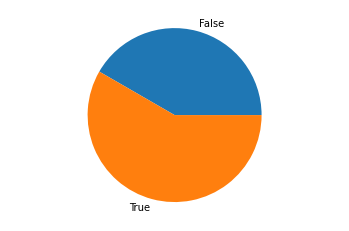

In [60]:
sums = new.min_air_pressure.groupby(new['is_raining?']).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

Plot the graph depending on humidity, how many days has it rained?

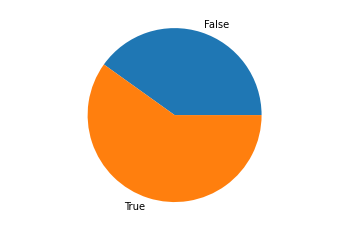

In [61]:
sums = new.max_humid.groupby(new['is_raining?']).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

Plot the graph depending on temperature, how many days has it rained?

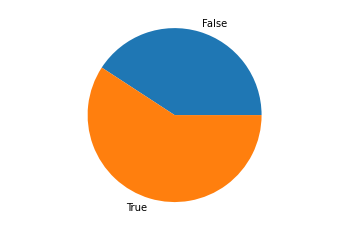

In [62]:
sums = new.max_temp.groupby(new['is_raining?']).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

Create the data set to train the model

In [63]:
X = new.drop(['max_prcp', 'is_raining?','city'], axis=1) #all columns except PRCP and RAIN, as both give the answer away.
y = new['max_prcp']

Split the data into training and testing data

In [64]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Check the training dataset

In [65]:
print(X_train.shape)

(1965, 7)


Check the testing dataset

In [66]:
print(X_test.shape)

(492, 7)


Confirm the datatypes before modelling

In [67]:
X_train.dtypes

max_temp            float64
date                  int64
min_temp            float64
max_humid             int64
min_humid             int64
max_air_pressure    float64
min_air_pressure    float64
dtype: object

Use RandomForestRegressor to train the data

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Calculate the scores

In [77]:
def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())
     print("\n")


from sklearn.model_selection import cross_val_score
import numpy


scores = cross_val_score(rf_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = numpy.sqrt(-scores)


Display the scores

In [78]:
display_scores(rf_rmse_scores)

Scores: [4.67346385 2.91173643 4.01601483 2.94436719 3.98362094 2.26264992
 4.3417387  3.3236166  2.78156405 3.37319538]
Mean: 3.4611967892876967
Standard deviation: 0.7293697873044744




Test the model

In [80]:
def predictVsActuals(day):
     precipPredictDay = X.loc[X['date'] == day]
     precipPredictValue = round(rf_model.predict(precipPredictDay)[0], 3)


     precipActual = weather.loc[wheather['date'] == day]
     precipActualValue = round(precipActual.iloc[0]["max_prcp"], 3)

     print("On", precipActual.iloc[0]["date"], "there was a high of", precipActual.iloc[0]["max_temp"], "and a low of", precipActual.iloc[0]["min_temp"])
     print("There were", precipActualValue, "inches of rainfall")
     print("We predicted",precipPredictValue, "inches of rainfall")
     print("we were off by ", round(abs(precipActualValue-precipPredictValue), 3), "inches")
     print("\n")